<a href="https://colab.research.google.com/github/abolidk/Practice/blob/main/MNIST(no_recognisation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import numpy as np
import pandas as pd
from keras.datasets import mnist
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data() #loaded mnist dataset

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
xtrain.shape , ytrain.shape ,xtest.shape,ytest.shape #checking shape of data

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

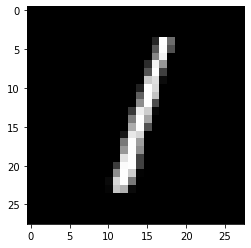

In [4]:
plt.imshow(xtest[2,:,:],cmap='gray') #checking data , provided grey as plt takes color img as default

In [5]:
#Represent Training & Testing samples suitable for SKlearn based ML models
x_train=xtrain.reshape(xtrain.shape[0],784).astype('float32')
x_test=xtest.reshape(xtest.shape[0],784).astype('float32')


In [6]:
x_train.shape,x_test.shape #checking shape

((60000, 784), (10000, 784))

In [7]:
# x_train=xtrain/255 scalling of data
x_train/=255      
x_test/=255


In [8]:
from sklearn.linear_model import LogisticRegression #importing libraries
from sklearn.neural_network import MLPClassifier #NN 
from sklearn import metrics
LR=LogisticRegression()
ANN=MLPClassifier(hidden_layer_sizes=(50,80,60)) #3-hidden layers


In [9]:
LR.fit(x_train,ytrain) #fitting logistic regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
ANN.fit(x_train,ytrain) #fitting ANN model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 80, 60), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [11]:
LR_predict=LR.predict(x_test) #predicting y
LR_cr=metrics.classification_report(ytest,LR_predict)
print(LR_cr) #printing classification report


              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.91      1032
           3       0.90      0.91      0.90      1010
           4       0.94      0.93      0.93       982
           5       0.90      0.87      0.89       892
           6       0.94      0.95      0.94       958
           7       0.94      0.92      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.92      0.92      0.92      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



In [12]:
LR_cm=metrics.confusion_matrix(ytest,LR_predict) #confusion matric for LR

In [13]:
metrics.accuracy_score(ytest,LR_predict) #checking accuracy of LR model

0.9256

In [14]:
#92% accuracy for Logistic regression  As per f1 score we can see 1 is predicted with 97% of accuracy and 8 is predicted with 88% of accuracy.

In [15]:
ANN_predict=ANN.predict(x_test) #predicting y with ANN

In [16]:
ANN_cr=metrics.classification_report(ytest,ANN_predict)
print(ANN_cr) #printing classification report of ANN


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.97      0.97      0.97       982
           5       0.95      0.98      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [17]:
metrics.accuracy_score(ytest,ANN_predict) #predicting 

0.9763

In [18]:
#for ANN model we are getting 97% 0,1 is predecting with 99% of accuracy as per f1 score